#                               SIDDHARTHA RANJAN

# Perform "EDA" on "Indian Premier League".

As a Sports analyst,you have to find out the most succesfull teams,players and factors contributing win or loss of team.
Suggested teams or player should endorse for brand.

# Import the libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import seaborn as sns
import math
%matplotlib inline

# Load the Dataset

In [2]:
filename = os.path.join(os.getcwd(),'matches.csv')
matches_df = pd.read_csv(filename)
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
filename = os.path.join(os.getcwd(),'deliveries.csv')
score_df = pd.read_csv(filename)
score_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
# Data Information
print(matches_df.info())
print(score_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [5]:
# Checking For Null Values
matches_df["umpire3"].isnull().sum()

637

In [6]:
# taking overall view of matches_df
matches_df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [7]:
# Ids we have got in the dataset
matches_df['id'].max()

11415

In [8]:
# Seasons we have got in the dataset
matches_df['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

# Now figuring out the Team that has won by the maximum run

In [9]:
matches_df.iloc[matches_df['win_by_runs'].idxmax()]
# idxmax will return the maximum value according to the correspondance parameter which is win_by_runs in this case.

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

Hence from the above data we got the details of the match that was won by maximum runs.

In [10]:
matches_df.iloc[matches_df['win_by_runs'].idxmax()]['winner']

'Mumbai Indians'

Now A/c to the data we will find out the best teams regarding to different parameters.

# Team won By Minimum Runs.

In [11]:
# Same as we did it earlier
matches_df.iloc[matches_df[matches_df['win_by_runs'].ge(1)].win_by_runs.idxmin()]['winner']

'Mumbai Indians'

# TEAM WON BY MAXIMUM WICKETS

In [12]:
matches_df.iloc[matches_df['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

# TEAM WON BY MINIMUM WICKETS

In [13]:
matches_df.iloc[matches_df[matches_df['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]['winner']

'Kolkata Knight Riders'

# OBSERVATION:

1. Mumbai Indians is the team that won has by maximum and minimum runs.
2. Kolkata Knight Riders is the team that has won by maximum and minimum wickets.

# NUMBER OF MATCHES GRAPH 

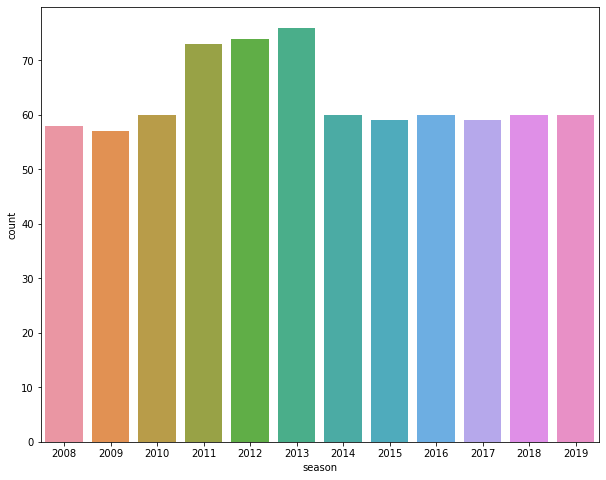

In [14]:
plt.figure(figsize=(10,8))
sns.countplot(x='season',data = matches_df)
plt.show()

SO FROM HERE WE CAN CONCLUDE THAT IN 2013 WE HAD THE MOST NUMBER OF MATCHES

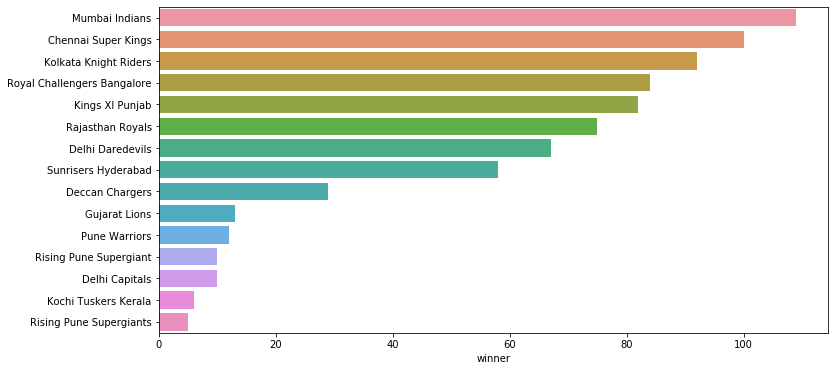

In [15]:
#Now we will find who won the maximum number of matches

plt.figure(figsize=(12,6))
data = matches_df.winner.value_counts()
sns.barplot(y = data.index, x = data)
plt.show()

HENCE FROM ABOVE IT IS CLEAR THAT MUMBAI INDIAN IS THE WINNER.

# MAN OF THE MATCH

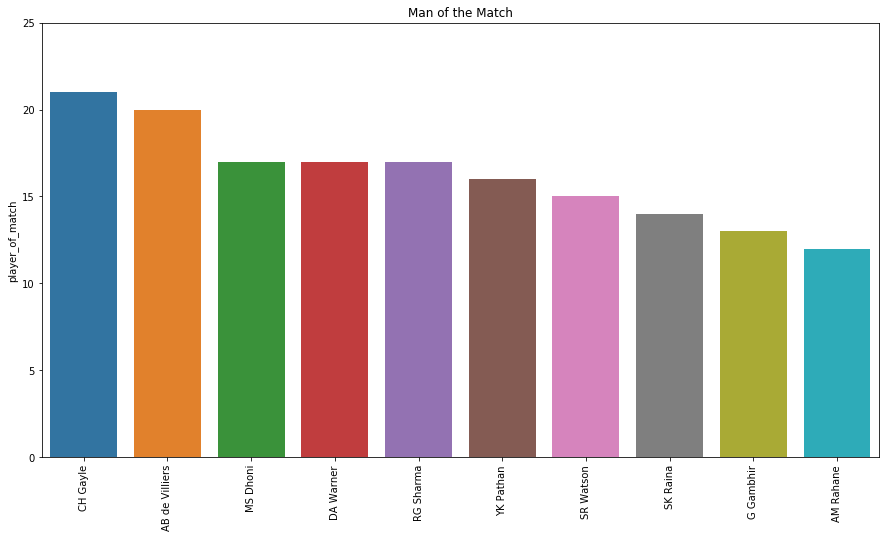

In [16]:
top_players = matches_df.player_of_match.value_counts()[:10]
fig , ax = plt.subplots(figsize=(15,8))
ax.set_ylim([0,25])
ax.set_ylabel("Count")
ax.set_title("Man of the Match")
top_players.plot.bar()
sns.barplot(x=top_players.index, y = top_players)
plt.show()

HENCE FROM THE ABOVE PICTURE IT IS CLEAR THAT CH GAYLE IS THE MOST SUCCESFULL PLAYER OF THE MATCH WINNERS.

# Number of Matches at each Venue

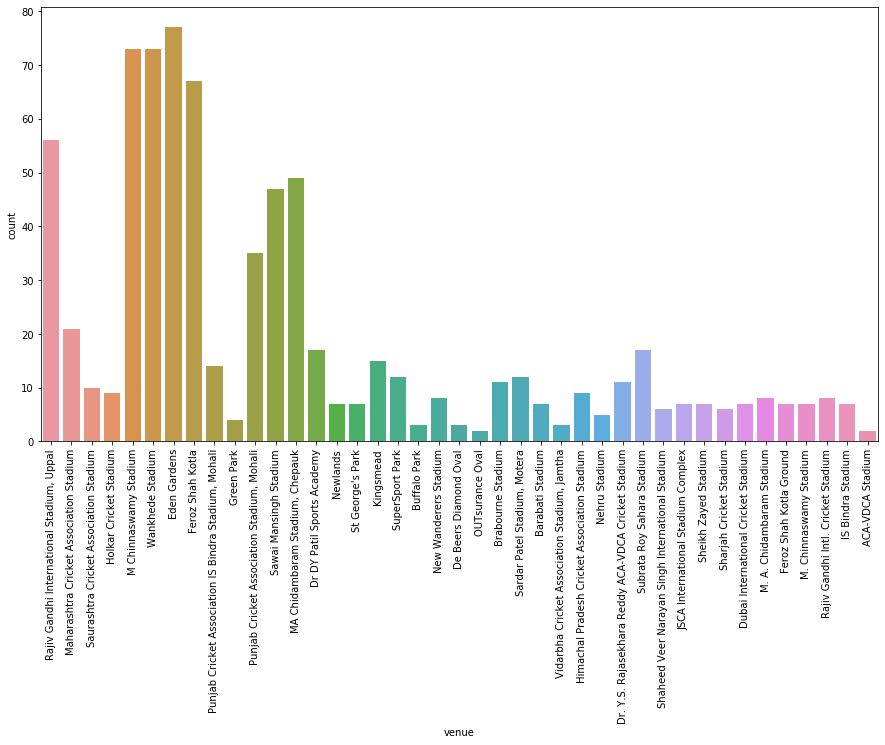

In [17]:
plt.figure(figsize=(15,8))
sns.countplot(x='venue',data = matches_df)
plt.xticks(rotation='vertical')
plt.show()

# NUMBER OF MATCHES PLAYED BY EACH TEAM

In [18]:
temp_df = pd.melt(matches_df, id_vars=['id','season'], value_vars=['team1','team2'])
# melt function is used to reshape the data
temp_df.head()

,id,season,variable,value
0,1,2017,team1,Sunrisers Hyderabad
1,2,2017,team1,Mumbai Indians
2,3,2017,team1,Gujarat Lions
3,4,2017,team1,Rising Pune Supergiant
4,5,2017,team1,Royal Challengers Bangalore


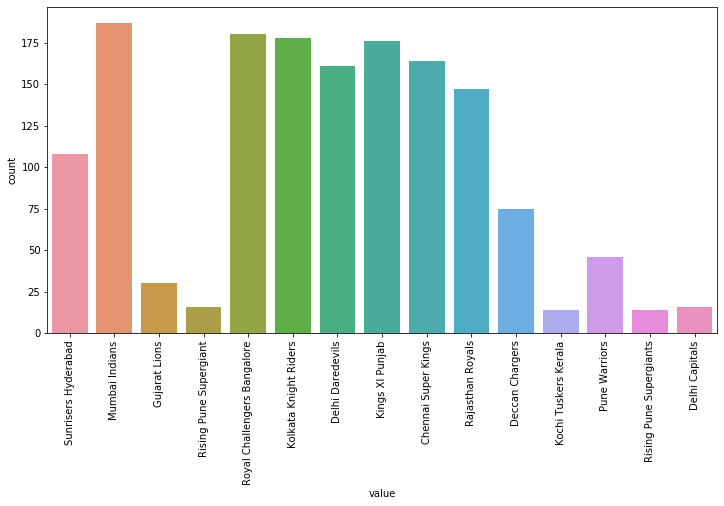

In [19]:
#Now we will plot the graph

plt.figure(figsize=(12,6))
sns.countplot(x='value', data = temp_df)
plt.xticks(rotation = 'vertical')
plt.show()

"MUMBAI INDIANS" LEADS THE SCOREBOARD FOLLOWED BY "ROYAL CHALLENGERS BANGALORE" AND THE LEAST IS "RISING PUNE SUPERGIANT" AND 
"KOCHI TUSKERS SUPERGIANTS".

# NUMBER OF WINS PER TEAM:

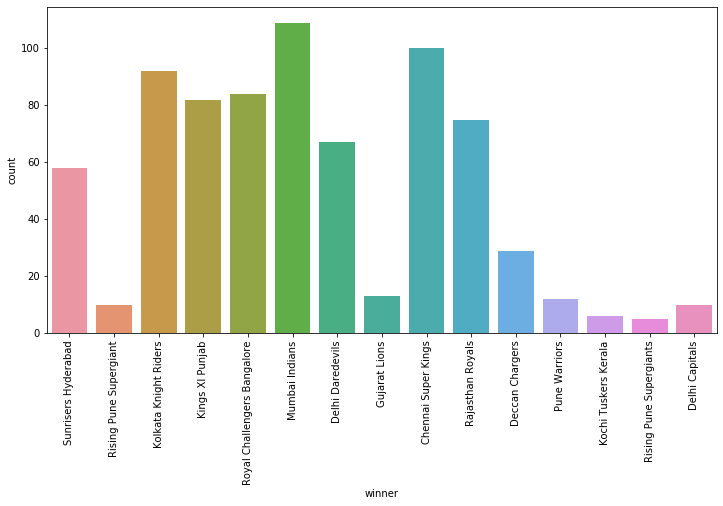

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(x='winner',data = matches_df)
plt.xticks(rotation='vertical')
plt.show()

"MI"  AGAIN LEADS THE SCORE BOARD FOLLOWED BY  "CSK".

So now we will see the champions in each season means the winner of particular season.

In [21]:
temp_df = matches_df.drop_duplicates(subset=['season'],keep = 'last')[['season','winner']].reset_index(drop=True)
temp_df

,season,winner
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad


# Now we will see the Toss decisions.

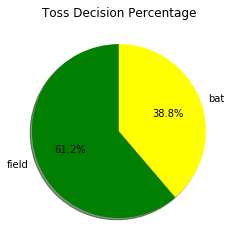

In [22]:
temp_series = matches_df.toss_decision.value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series/temp_series.sum())*100))
colors = ['green','yellow']
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%',shadow=True,startangle=90)
plt.title("Toss Decision Percentage")
plt.show()

Alomost 61.2 percent of toss decision is for the field first.Now we will see how the decision varied with time.

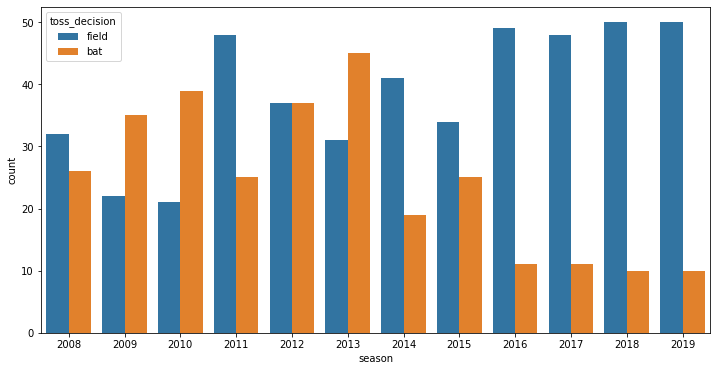

In [23]:
plt.figure(figsize=(12,6))
# since we want a coloured plot so we will use hue for toss decisions.
sns.countplot(x = 'season', hue = 'toss_decision', data = matches_df)
plt.show()

Look at the graph teams at the first part likes to bat first but after 2016 teams likes to field first.

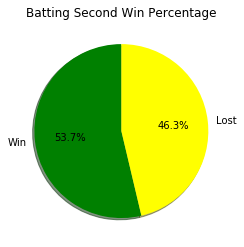

In [24]:
#Since there is a very strong trend towards batting second let us see the win percentage of the teams batting second.
num_of_wins = (matches_df.win_by_wickets>0).sum()
num_of_loss = (matches_df.win_by_wickets==0).sum()
labels = ['Win','Lost']
total = float(num_of_wins + num_of_loss)
sizes = [(num_of_wins)/total*100,(num_of_loss)/total*100]
colors = ['green','yellow']
plt.pie(sizes, labels = labels, colors = colors, autopct = '%1.1f%%',shadow = True,startangle = 90)
plt.title('Batting Second Win Percentage')
plt.show()

So Percentage of times teams batting second has won is 53.7. So now let us split this by year and see the Distribution.

# Top Player of the Match:

In [25]:
#Create a function for Labellling.
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2.0, 1.02 * height,'%d'% int(height),ha='center',va='bottom')

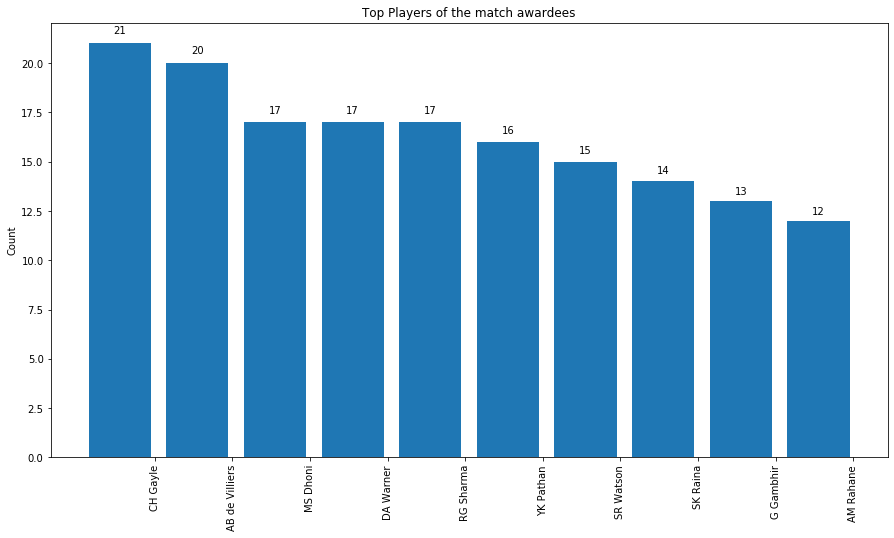

In [26]:
temp_series = matches_df.player_of_match.value_counts()[:10]
labels = np.array(temp_series.index)
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_series))
ax.set_xticks(ind+((width)/2.0))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Players of the match awardees")
autolabel(rects)
plt.show()

CH Gayle is the top player of the match awardee in all the seasons of IPL.

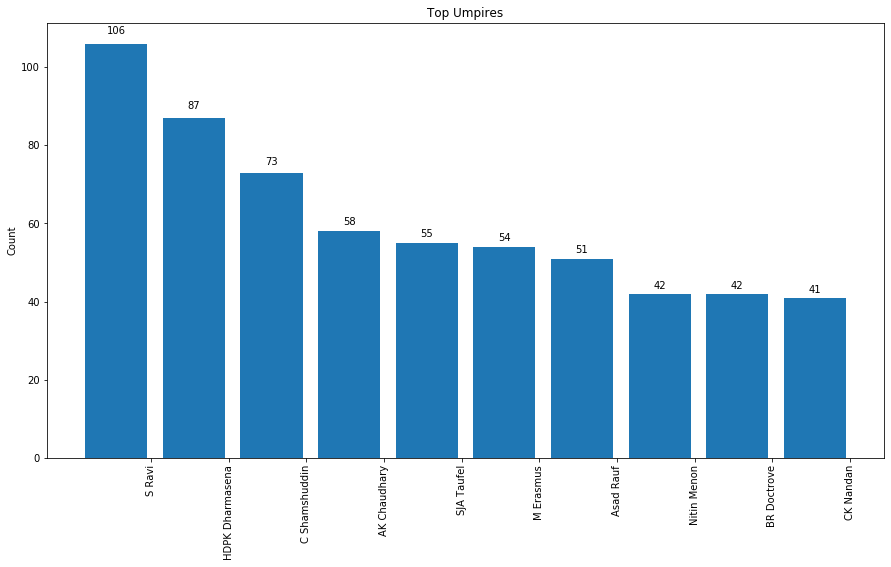

In [29]:
temp_df = pd.melt(matches_df, id_vars = ['id'], value_vars = ['umpire1','umpire2'])

temp_series = temp_df.value.value_counts()[:10]
labels = np.array(temp_series.index)
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_series))
ax.set_xticks(ind+((width)/2.0))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Umpires")
autolabel(rects)
plt.show()

Dharmasena seems to be the most sought after umpire for IPL matches followed by Ravi. Others are fairly close to each other.

# SCORE DATASET

In [30]:
score_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


Batsman analysis:

Let us start our analysis with batsman. Let us first see the ones with most number of IPL runs under their belt.

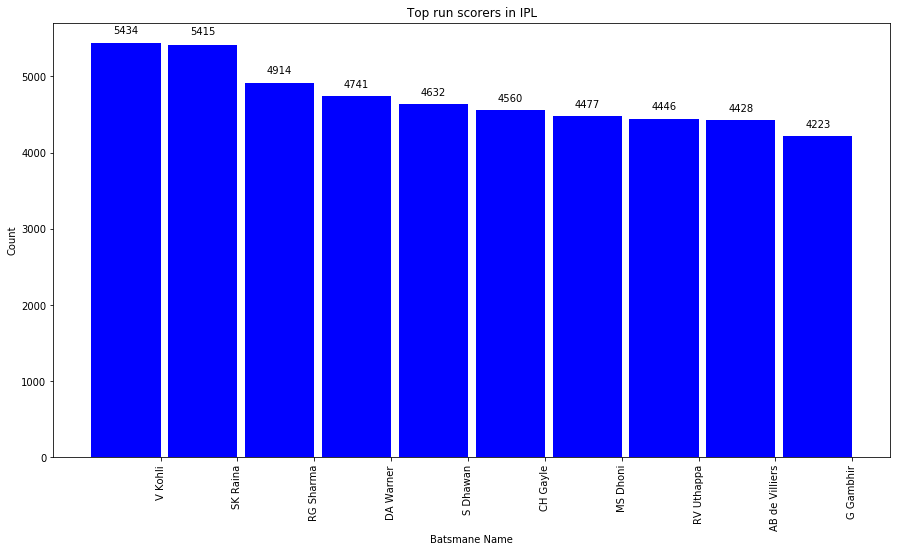

In [31]:
temp_df = score_df.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs', ascending = False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='blue')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top run scorers in IPL")
ax.set_xlabel('Batsmane Name')
autolabel(rects)
plt.show()

V KOHLI AND SK RAINA ARE THE TOP PERFORMERS AND DA WARNER IN FOREIGNERS.

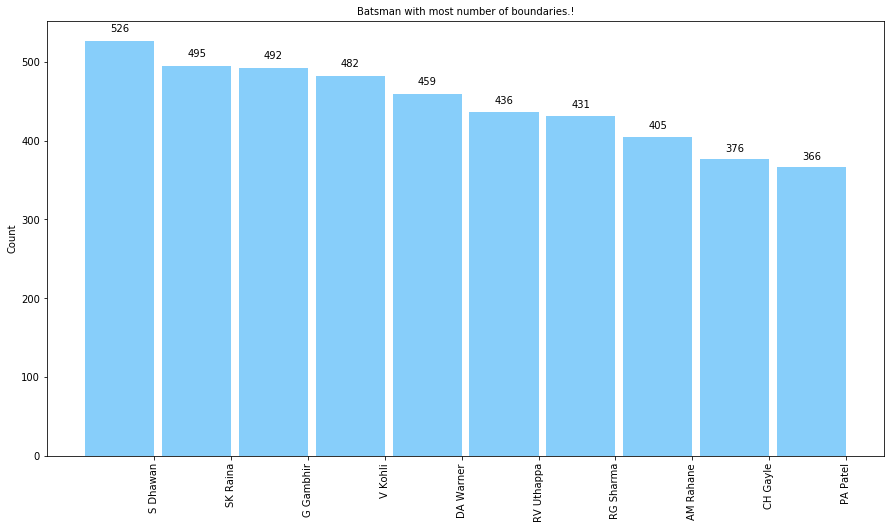

In [32]:
temp_df = score_df.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='lightskyblue')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of boundaries.!",fontsize = 10)
autolabel(rects)
plt.show()

S DHAWAN HAS THE HIGHEST NUMBER OF BOUNDARIES.

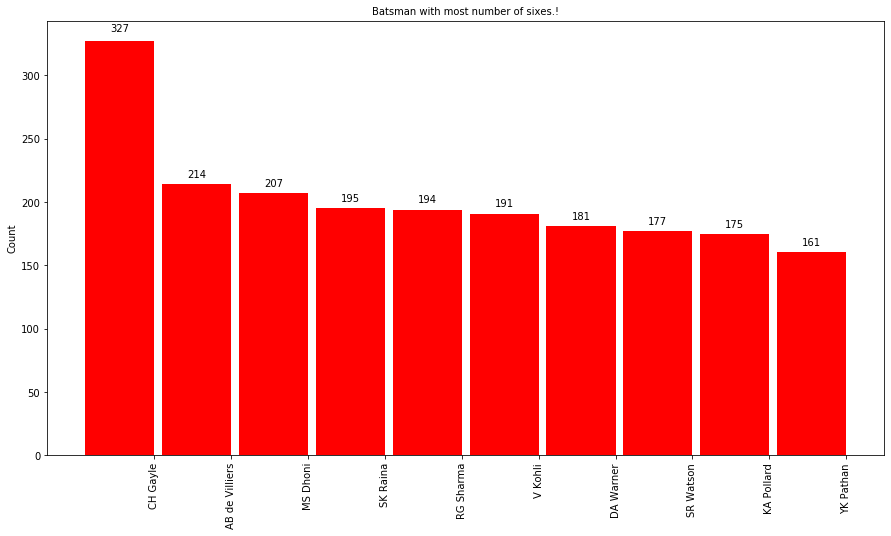

In [33]:
temp_df = score_df.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='red')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of sixes.!",fontsize = 10)
autolabel(rects)
plt.show()

HENCE IT IS CLEAR THAT CHRIS GAYLE IS AT THE TOP OF THE LEADERBOARD.

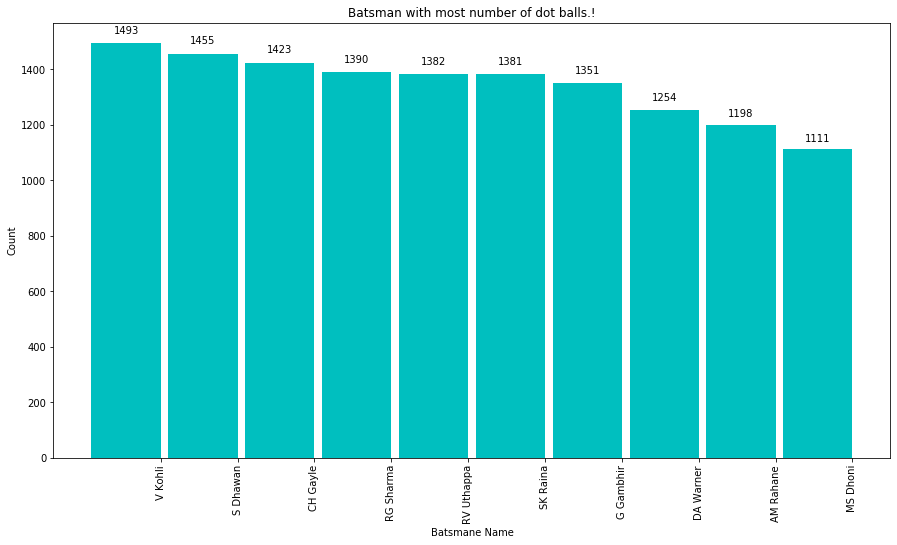

In [34]:
# Now let us see the batsman who has played the most number of dot balls.
temp_df = score_df.groupby('batsman')['batsman_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width, color='c')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of dot balls.!")
ax.set_xlabel('Batsmane Name')
autolabel(rects)
plt.show()

IT IS INTERSETING TO SEE THAT V KOHLI HAS PLAYED THE MOST NUMBER OF DOT BALLS.

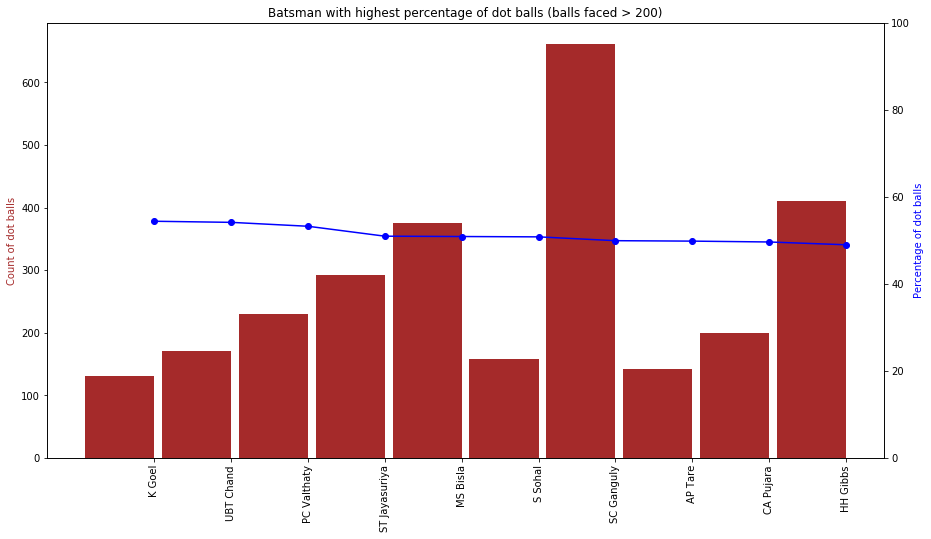

In [35]:
# Let us check the percentage distribution now.

def balls_faced(x):
    return len(x)

def dot_balls(x):
    return (x==0).sum()

temp_df = score_df.groupby('batsman')['batsman_runs'].agg([balls_faced, dot_balls]).reset_index()
temp_df = temp_df.loc[temp_df.balls_faced>200,:]
temp_df['percentage_of_dot_balls'] = (temp_df['dot_balls'] / temp_df['balls_faced'])*100.
temp_df = temp_df.sort_values(by='percentage_of_dot_balls', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

fig, ax1 = plt.subplots(figsize=(15,8))
ax2 = ax1.twinx()
labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
rects = ax1.bar(ind, np.array(temp_df['dot_balls']), width=width, color='brown')
ax1.set_xticks(ind+((width)/2.))
ax1.set_xticklabels(labels, rotation='vertical')
ax1.set_ylabel("Count of dot balls", color='brown')
ax1.set_title("Batsman with highest percentage of dot balls (balls faced > 200)")
ax2.plot(ind+0.45, np.array(temp_df['percentage_of_dot_balls']), color='b', marker='o')
ax2.set_ylabel("Percentage of dot balls", color='b')
ax2.set_ylim([0,100])
ax2.grid(b=False)
plt.show()

Batsman with more than 300 balls faced in taken and the ones with higher percentage of dot balls are seen. It is interesting to see Ganguly with more than 1000 balls and nearly half of them are dot balls. It is surprising to see names like Jayasuriya and Gibbs in there.!

# Bowler Analysis:

Now let us see the bowler who has bowled the maximum number of balls in IPL.

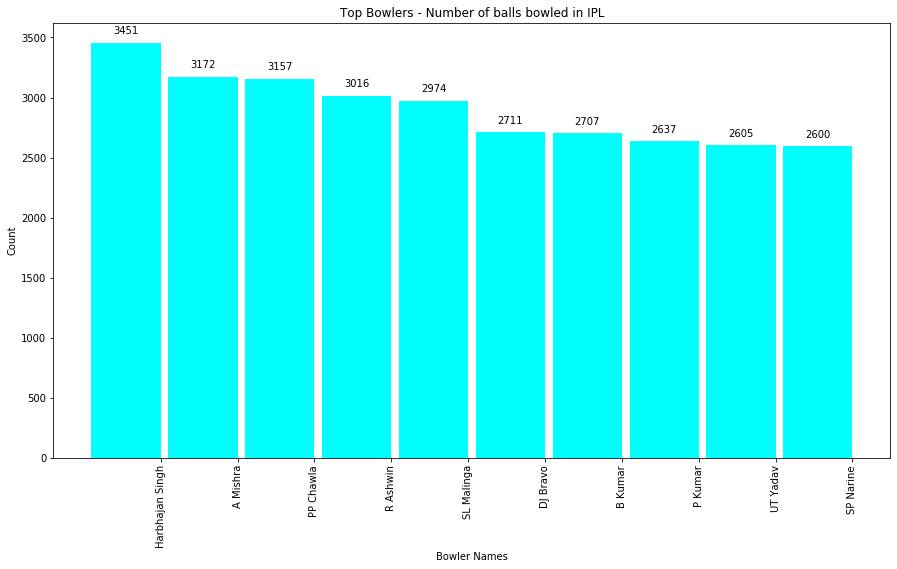

In [39]:
temp_df = score_df.groupby('bowler')['ball'].agg('count').reset_index().sort_values(by='ball', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]
labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['ball']), width=width, color='cyan')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Bowlers - Number of balls bowled in IPL")
ax.set_xlabel('Bowler Names')
autolabel(rects)
plt.show()

Harbhajan Singh is the the bowler with most number of balls bowled in IPL matches. Now let us see the bowler with more number of dot balls.

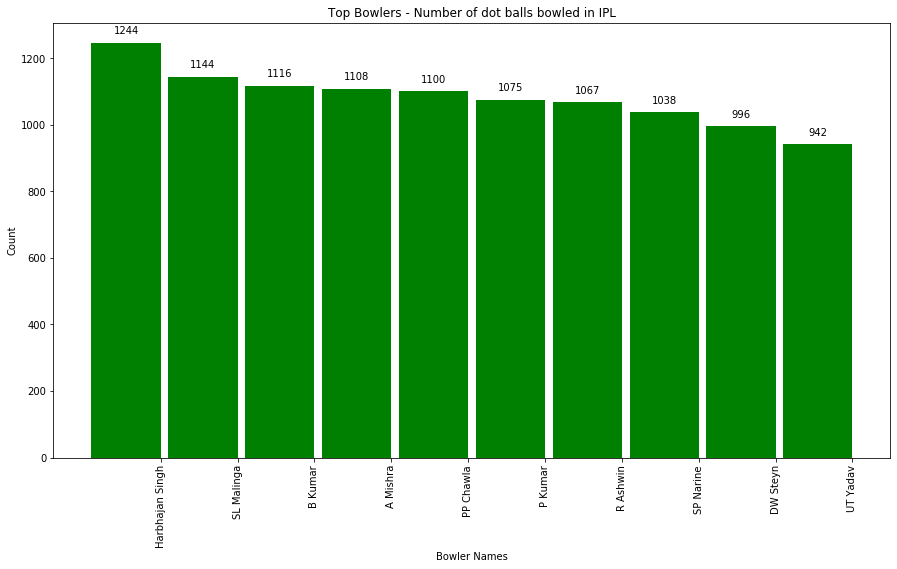

In [40]:
# Now let us see who has the most number of dot balls

temp_df = score_df.groupby('bowler')['total_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='total_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['total_runs']), width=width, color='green')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Bowlers - Number of dot balls bowled in IPL")
ax.set_xlabel('Bowler Names')
autolabel(rects)
plt.show()

Harbhajan Singh Again leads the chart.

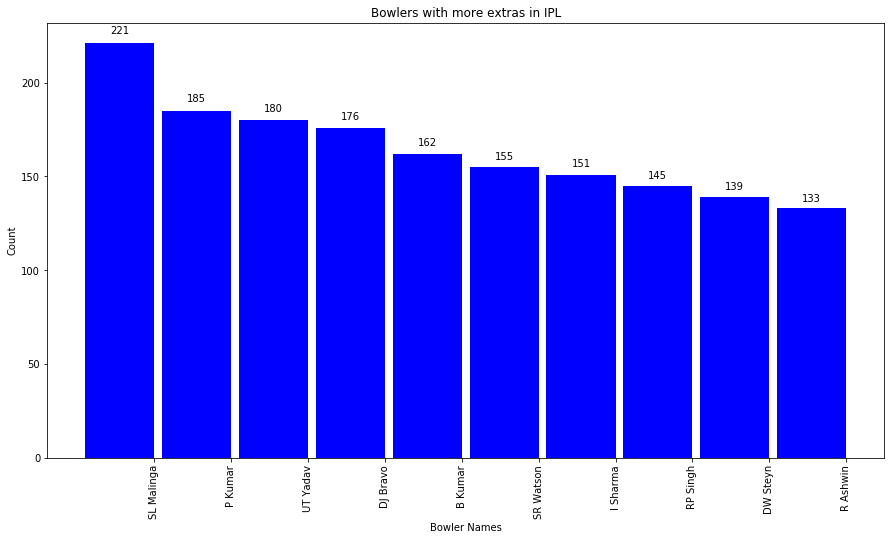

In [42]:
# Now let us see the bowler who bowled the more number of extras in IPL.

temp_df = score_df.groupby('bowler')['extra_runs'].agg(lambda x: (x>0).sum()).reset_index().sort_values(by='extra_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['extra_runs']), width=width, color='blue')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Bowlers with more extras in IPL")
ax.set_xlabel('Bowler Names')
autolabel(rects)
plt.show()

SL Malinga tops the chart.

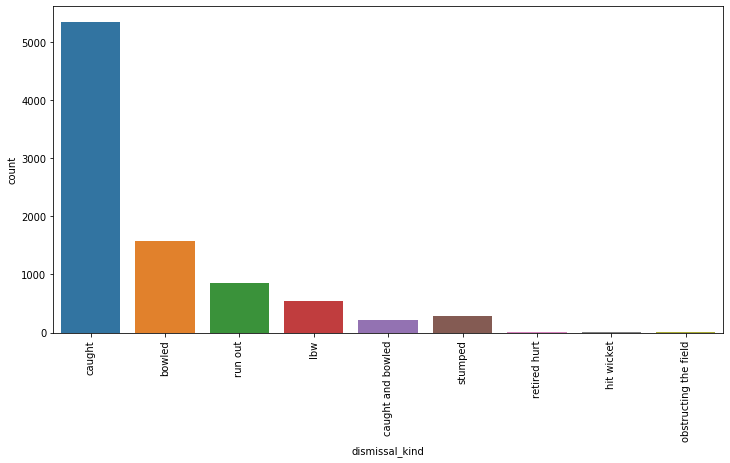

In [43]:
# Now let us see most common dismissal types in IPL.
plt.figure(figsize=(12,6))
sns.countplot(x='dismissal_kind', data=score_df)
plt.xticks(rotation='vertical')
plt.show()

Caught is the most common dismissal type in IPL followed by Bowled. There are very few instances of hit wicket as well. 'Obstructing the field' is one of the dismissal type as well in IPL.!